In [5]:
import sys, os
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

In [6]:
# Some Function that we take the expectation value of
def h(x, m, s):
    return np.exp(-0.5*((x-m)/s)**2)/(s*np.sqrt(2*np.pi))

5.001639379331379


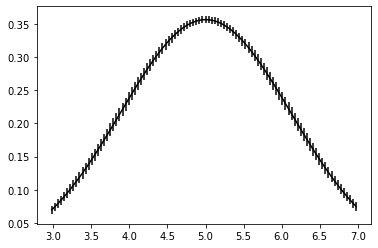

In [7]:
# pss=psi_squared | m=mean | s=std | post=posterior
pss_m = 5
pss_s = 0.5
h_s = 1
N=10000
Ndata = 100
norm = 1#Ndata
#rnd.seed(1400)

psiS = rnd.normal(loc=pss_m, scale=pss_s, size=N)
data_x = (np.arange(Ndata)-Ndata/2.)*8.0*pss_s/(Ndata-1) + pss_m
data = np.array([h(data_x, m, h_s) for m in psiS])
std = np.std(data, axis=0)
sem = std/np.sqrt(N/100)
data = np.mean(data, axis=0)
fig, ax = plt.subplots()
ax.errorbar(data_x, data, yerr=sem, fmt="-", color='k')
fig.savefig("toy_data.png")

step = 0.03
print(np.mean(psiS))

In [20]:
#post_ = [4]
while len(post_) < 5e6:

    p0 = post_[-1]
    p  = p0 + rnd.uniform(-1, 1)*step
    r = np.exp(-0.5/norm*np.sum(
        ((h(data_x, p, h_s) - data)**2\
        - (h(data_x, p0, h_s) - data)**2)/sem**2))
    if r > 1:
        post_.append(p)
    elif r > rnd.uniform(0, 1):
        post_.append(p)

    if len(post_) % 10000 == 0:
        print("Size: ", len(post_), np.mean(post_))


Size:  4000000 5.00089093035101
Size:  4010000 5.000890929586769
Size:  4020000 5.000890745159016
Size:  4020000 5.000890745159016
Size:  4020000 5.000890745159016
Size:  4020000 5.000890745159016
Size:  4030000 5.0008908661682145
Size:  4040000 5.0008907174928385
Size:  4040000 5.0008907174928385
Size:  4040000 5.0008907174928385
Size:  4040000 5.0008907174928385
Size:  4040000 5.0008907174928385
Size:  4040000 5.0008907174928385
Size:  4040000 5.0008907174928385
Size:  4040000 5.0008907174928385
Size:  4050000 5.000890752333484
Size:  4050000 5.000890752333484
Size:  4060000 5.000890922318937
Size:  4060000 5.000890922318937
Size:  4060000 5.000890922318937
Size:  4070000 5.000890703587413
Size:  4080000 5.000890678133494
Size:  4080000 5.000890678133494
Size:  4080000 5.000890678133494
Size:  4080000 5.000890678133494
Size:  4080000 5.000890678133494
Size:  4080000 5.000890678133494
Size:  4090000 5.000890709336206
Size:  4100000 5.000890580560675
Size:  4100000 5.000890580560675
Si

Size:  4750000 5.000889107771377
Size:  4760000 5.000889063023069
Size:  4760000 5.000889063023069
Size:  4770000 5.000889263430797
Size:  4770000 5.000889263430797
Size:  4770000 5.000889263430797
Size:  4770000 5.000889263430797
Size:  4780000 5.000889131955959
Size:  4790000 5.000889579634506
Size:  4800000 5.000889637437771
Size:  4800000 5.000889637437771
Size:  4810000 5.000889612006996
Size:  4810000 5.000889612006996
Size:  4820000 5.000889623376099
Size:  4820000 5.000889623376099
Size:  4820000 5.000889623376099
Size:  4820000 5.000889623376099
Size:  4830000 5.0008897115029445
Size:  4830000 5.0008897115029445
Size:  4840000 5.000889798529683
Size:  4840000 5.000889798529683
Size:  4850000 5.000889806317757
Size:  4850000 5.000889806317757
Size:  4860000 5.000889942650108
Size:  4870000 5.000889845424643
Size:  4880000 5.000889638235445
Size:  4880000 5.000889638235445
Size:  4890000 5.000889471075155
Size:  4890000 5.000889471075155
Size:  4890000 5.000889471075155
Size:  4

In [21]:
print(np.array(post_).shape)
post = np.reshape(np.array(post_), (-1, 25))
print(post.shape)
post = post[:,0]
post = post[100:]

(5000000,)
(200000, 25)


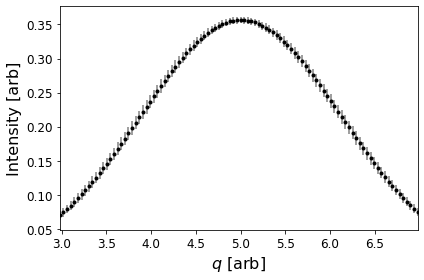

In [22]:
fig, ax = plt.subplots()
ax.errorbar(data_x, data, yerr=sem, fmt=".", color='k', ecolor='gray')
ax.set_xlim(data_x[0], data_x[-1])
ax.set_xlabel(r"$q$ [arb]", fontsize=16)
ax.set_ylabel(r"Intensity [arb]", fontsize=16)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.tight_layout()
fig.savefig("toy_data.png")

5.00089579830987 0.006406360874442807
5.00089579830987


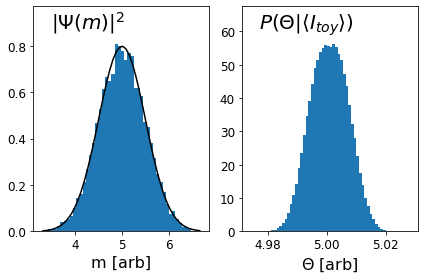

In [26]:
print(np.mean(post), np.std(post))
label_size=16
tick_size = 12
fig, ax = plt.subplots(1, 2)
#        gridspec_kw={"hspace":5})

nn0, bins0 = np.histogram(psiS, bins=50, density=True)
ax[0].bar((bins0[:-1]+bins0[1:])/2., height=nn0.astype(float), width=bins0[1]-bins0[0], align='center')
nn, bins = np.histogram(np.reshape(np.array(post), (-1)), bins=60, density=True)
ax[1].bar((bins[:-1]+bins[1:])/2., height=nn.astype(float), width=bins[1]-bins[0], align='center')
#ax[1].hist(np.reshape(np.array(post[10000:]), (-1)), bins=50)

mode_ind = np.argmax(nn)
mode = np.mean(post)#(bins[mode_ind+1]+bins[mode_ind])/2
print(mode)
x_res = (bins0[:-1]+bins0[1:])/2.
y_res = h(x_res, mode, pss_s)
ax[0].plot(x_res, y_res, '-k')

ax[0].text(0.1, 0.9, r"$|\Psi(m)|^2$", transform=ax[0].transAxes, fontsize=20)
ax[1].text(0.1, 0.9, r"$P(\Theta | \langle I_{toy}\rangle)$", transform=ax[1].transAxes, fontsize=20)
ax[0].set_xlabel("m [arb]", fontsize=label_size)
ax[1].set_xlabel("$\Theta$ [arb]", fontsize=label_size)
ax[0].tick_params(axis='x', labelsize=tick_size)
ax[0].tick_params(axis='y', labelsize=tick_size)
ax[1].tick_params(axis='x', labelsize=tick_size)
ax[1].tick_params(axis='y', labelsize=tick_size)
ax[0].set_ylim(0,1.2*np.amax(nn0))
ax[1].set_ylim(0,1.2*np.amax(nn))
plt.tight_layout()
fig.savefig("toy_mcmc_results.png")